In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [2]:
import seaborn as sns
import re
import sys
from time import sleep

In [3]:
data7=pd.read_csv('after_prepocessing.csv')
data7=data7.drop('Unnamed: 0',axis='columns')

In [4]:
# Independent variables:
X = data7.drop('price', axis='columns')
X.head()

,bath,BHK,total_sqft_clean,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Varthur,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,4.0,4,2850.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3,1630.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3,1875.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,3,1200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2,1235.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y = data7['price']
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# model selection

In [8]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [9]:
model = Ridge(alpha=0.1, max_iter=1)
model.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [10]:
ypred = model.predict(X_test)

Text(0, 0.5, 'Actual Price')

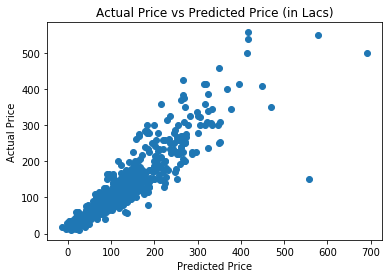

In [11]:
#visualising test vs predicted data
plt.scatter(ypred, y_test)
plt.title('Actual Price vs Predicted Price (in Lacs)')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')

In [12]:
errors = abs(ypred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 19.25 degrees.


In [13]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 81.31 %.


In [14]:
X.columns

Index(['bath', 'BHK', 'total_sqft_clean', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       ...
       'Varthur', 'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yeshwanthpur'],
      dtype='object', length=222)

In [15]:
pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])

,Coefficient
bath,4.278776
BHK,3.133470
total_sqft_clean,0.082673
1st Block Jayanagar,128.256492
1st Phase JP Nagar,13.493155
...,...
Whitefield,-21.682474
Yelachenahalli,-20.648192
Yelahanka,-24.994088
Yelahanka New Town,-16.035251


# Prediction

In [16]:
def predict_pr(location, sqft, bath, bhk, data=X):
    loc_index = np.where(data.columns==location)[0][0]
    x = np.zeros(len(data.columns)) #init a new array with zero values.
    x[0] = bath
    x[1] = bhk
    x[2] = sqft
    if loc_index >= 0:
        x[loc_index] = 1
    return model.predict([x])[0]

In [17]:
from flask import Flask,request, render_template
app = Flask(__name__)

@app.route('/')
def hello():
    return render_template("index.html")

@app.route('/predict',methods=['POST','GET'])
def predict_price(data=X):
    location=request.form['Location']
    sqft=request.form['sqft']
    bath=request.form['bath']
    bhk=request.form['bhk']
    loc_index = np.where(data.columns==location)[0][0]
    x = np.zeros(len(data.columns))
    x[0] = int(bath)
    x[1] = int(bhk)
    x[2] = int(sqft)
    if loc_index >= 0:
        x[loc_index] = 1
    prediction=model.predict([x])[0]
    return render_template("index.html", pred='Predicted price is {0:.2f}'.format(prediction*100000))

if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
[2020-04-13 10:22:37,830] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "C:\Users\jaydip\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\jaydip\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\jaydip\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\jaydip\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\jaydip\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\jaydip\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "<ipython-input-1

127.0.0.1 - - [13/Apr/2020 10:23:00] "GET / HTTP/1.1" 500 -


In [8]:
for x in X.columns:
    print('<option>'+x+'</option>')

<option>bath</option>
<option>BHK</option>
<option>total_sqft_clean</option>
<option>1st Block Jayanagar</option>
<option>1st Phase JP Nagar</option>
<option>2nd Stage Nagarbhavi</option>
<option>5th Block Hbr Layout</option>
<option>5th Phase JP Nagar</option>
<option>6th Phase JP Nagar</option>
<option>7th Phase JP Nagar</option>
<option>8th Phase JP Nagar</option>
<option>9th Phase JP Nagar</option>
<option>AECS Layout</option>
<option>Abbigere</option>
<option>Akshaya Nagar</option>
<option>Ambalipura</option>
<option>Ambedkar Nagar</option>
<option>Amruthahalli</option>
<option>Anandapura</option>
<option>Ananth Nagar</option>
<option>Anekal</option>
<option>Anjanapura</option>
<option>Ardendale</option>
<option>Arekere</option>
<option>Attibele</option>
<option>BEML Layout</option>
<option>BTM 2nd Stage</option>
<option>BTM Layout</option>
<option>Badavala Nagar</option>
<option>Balagere</option>
<option>Banashankari</option>
<option>Banashankari Stage II</option>
<option>Banasha